In [1]:
import os
import numpy as np
import pandas as pd

In [43]:
actual_name = {'one_liners': '16kOL',
               'pun_of_the_day': 'PotD',
               'semeval_2017_task_7': 'EnPuns',
               'short_jokes': 'ShJ',
               'reddit_jokes_last_laught': 'ReJ',
               'semeval_2021_task_7': 'Haha',
               'funlines_and_human_microedit_paper_2023': 'FL+HME',
               'unfun_me': 'Uf.me',
               'the_naughtyformer': 'NF',
               'meta_dataset': 'COMB'}

## Замена слова

In [5]:
main_path = 'aa_atack_orig/pred_data'
dfs = []
for file in os.listdir(main_path):
    if not (file.startswith('.') or file.endswith('pos.csv')):
        dfs.append(pd.read_csv(f'{main_path}/{file}', index_col=False))

In [16]:
np.random.seed(7)
idx = np.random.choice(np.arange(len(dfs)), 3)

for i in idx:
    df = dfs[i]
    example = df.iloc[np.random.choice(np.arange(len(df)), 1)]
    print('___________________________________')
    print(example['data_muse_joke'].to_list())
    print(example['text'].to_list())

___________________________________
['By perseverance the snail reached the aargh .']
['By perseverance the snail reached the arc .']
___________________________________
['JURY SELECTION PROVING DIFFICULT IN TRIAL OF THE sensory']
['JURY SELECTION PROVING DIFFICULT IN TRIAL OF THE CENTURY']
___________________________________
['Robert Downey Jr . Could n’t Look More Miserable in ‘ Dolittle , ’ a Confusingly Weird Kids ’ mavo']
['Robert Downey Jr . Could n’t Look More Miserable in ‘ Dolittle , ’ a Confusingly Weird Kids ’ Movie']


## Замена символов

In [40]:
main_path = 'black_box/results'
dfs = []
for file in os.listdir(main_path):
    if not file.startswith('.'):
        dfs.append((file, pd.read_csv(f'{main_path}/{file}', index_col=False)))

In [41]:
np.random.seed(16)
idx = np.random.choice(np.arange(len(dfs)), 3)

for i in idx:
    df = dfs[i][1]
    example = df.iloc[np.random.choice(np.arange(len(df)), 1)]
    print('___________________________________')
    print(example['text'].to_list())
    print(example['attacked_text'].to_list())

___________________________________
['hannibal crossed the alps because it was safer than crossing the elephants']
['<AttackedText "hannbial crossed the alp because it was safer than crVossing the elephants">']
___________________________________
['He s got to change that perception to let people know that he has changed that he learned something']
['<AttackedText "e s got to change that perception to let people know that he has changed that he learned soething">']
___________________________________
['GRAFFITI ARTIST COMPLETES MASTERWORK ‘STILL LIFE OF OBAMA’']
['<AttackedText "GRAFFITI ARTIST COMPLETES MASTERWORK ‘STILL LIFE OF OBeAMA’">']


In [50]:
for file, df in dfs:
    name = actual_name[file.split('-')[0]]
    change_result = (df['label'] != df['new_label']).sum() / len(df) * 100
    print(name, f'{change_result:.1f}')

16kOL 62.6
FL+HME 35.9
COMB 63.8
NF 0.4
ReJ 42.6
Uf.me 1.4
ShJ 26.1
Haha 68.1
EnPuns 53.4
PotD 51.2


## Сокращение входа

In [51]:
main_path = 'input_reduction/results'
dfs = []
for file in os.listdir(main_path):
    if not file.startswith('.'):
        dfs.append((file, pd.read_csv(f'{main_path}/{file}', index_col=False)))

In [54]:
np.random.seed(3)
idx = np.random.choice(np.arange(len(dfs)), 3)

for i in idx:
    df = dfs[i][1]
    example = df.iloc[np.random.choice(np.arange(len(df)), 1)]
    print('___________________________________')
    print(example['text'].to_list())
    print(example['attacked_text'].to_list())

___________________________________
['Trump Signals End To DACA , Calls On Congress To Act ']
['<AttackedText "Signals , Calls Congress To Act ">']
___________________________________
["Man says to wife, What would you do if I won the lottery?_____Wife replies, Take half and leave your sorry ass. Husband replies, Good, I won 12 dollars, here's 6 now get the hell out!"]
['<AttackedText "Man wife, would if won the lottery?_____, Take leave your ass. Husband,, won, here\'s 6 now the out!">']
___________________________________
['Shoot And Release Program Catches On With Hunters']
['<AttackedText "Program On ">']


In [56]:
def process(text):
    text = text.split('"')[1:-1]
    text = '"'.join(text)
    return text

In [62]:
for i in range(len(dfs)):
    dfs[i][1]['attacked_text'] = dfs[i][1]['attacked_text'].apply(process)

In [64]:
texts = []
for i in range(len(dfs)):
    texts.append((dfs[i][0], ' '.join(dfs[i][1]['attacked_text'].to_list())))

In [103]:
additional_stopwords = set(['s', 't', 'kbGay', 'don', 'd', 'm', 've', '_____', 'll', 'ain', ])

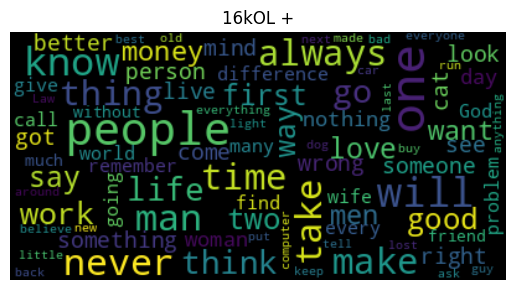

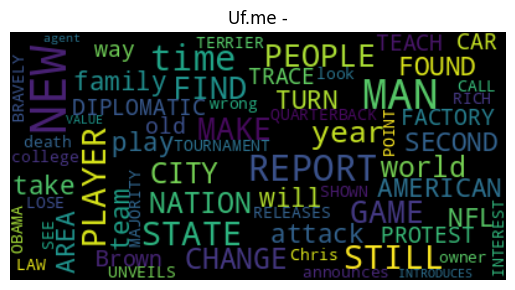

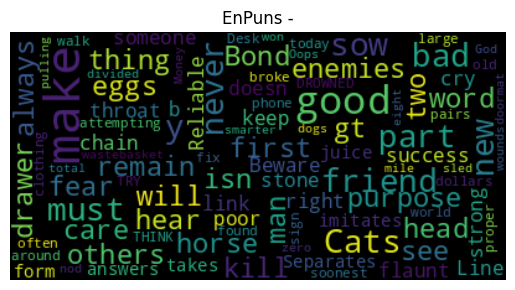

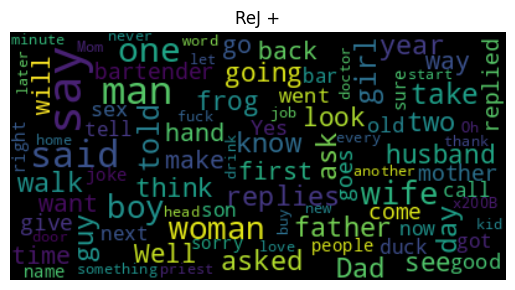

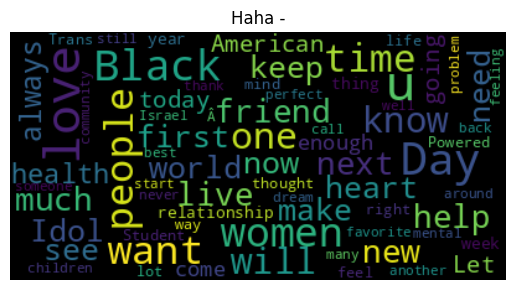

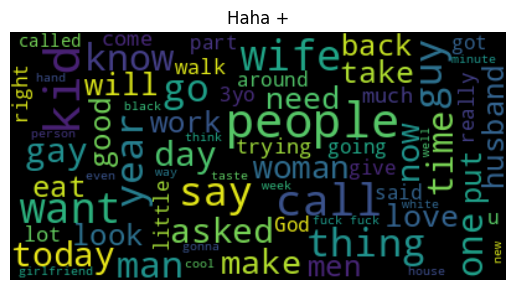

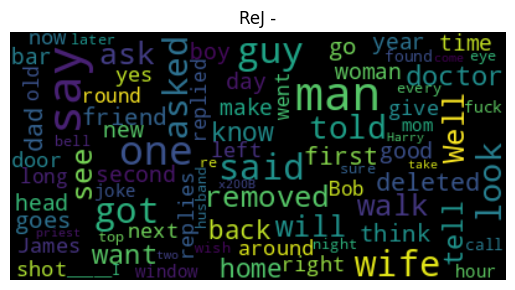

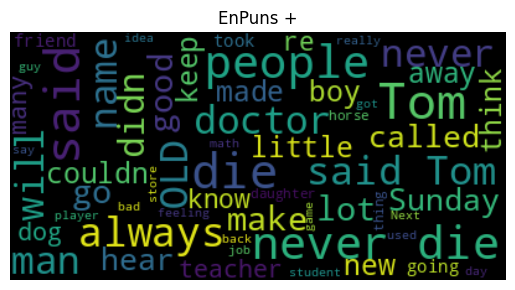

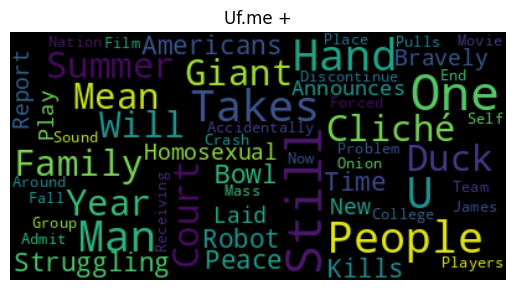

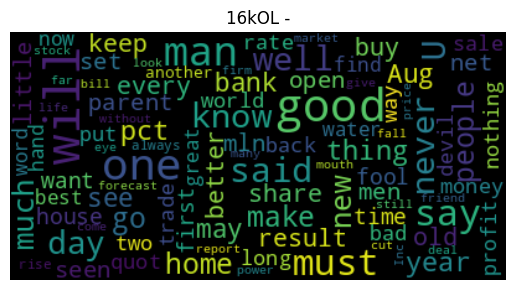

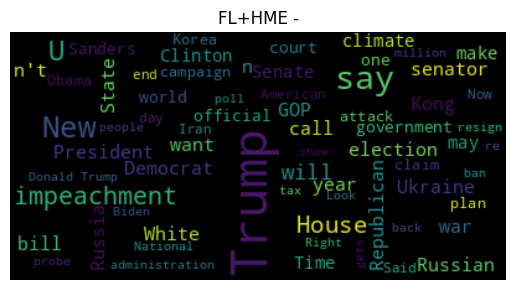

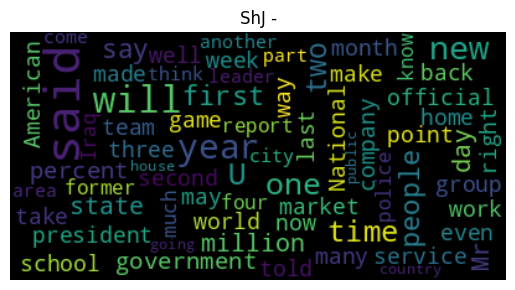

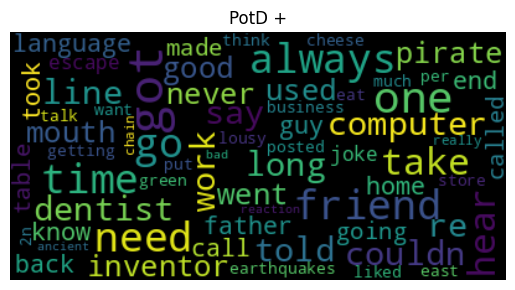

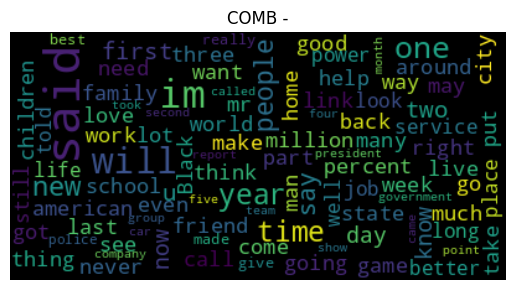

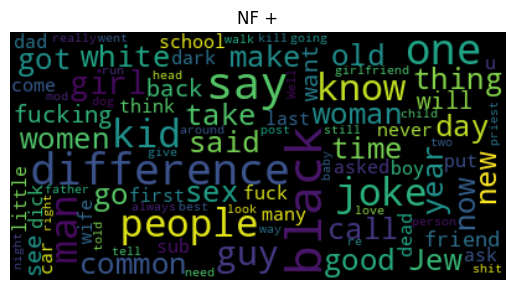

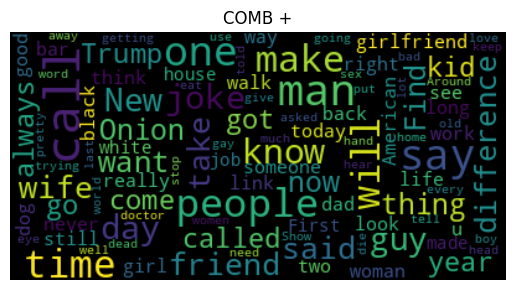

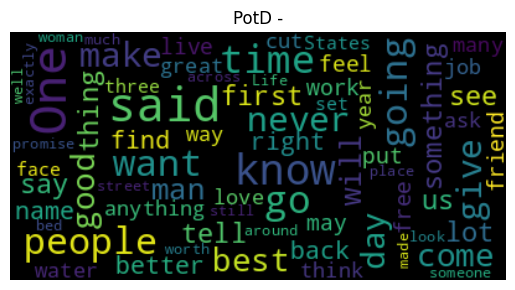

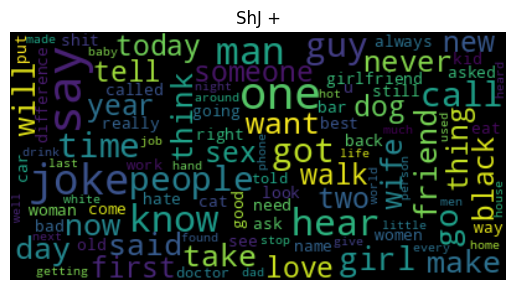

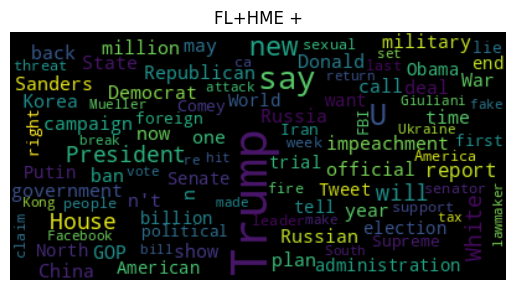

<Figure size 640x480 with 0 Axes>

In [104]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

res = {}
for file, text in texts:
    wordcloud_name = file.split('.')[0]
    title = actual_name[file.split('-')[0]]
    label = wordcloud_name.split('_')[-1]
    if label == 'positive':
        title = title + ' +'
    else:
        title = title + ' -'
    wordcloud = WordCloud(max_font_size=40, min_font_size=10, random_state=1)#.generate(text)
    stopwords = wordcloud.stopwords | additional_stopwords
    wordcloud = WordCloud(max_font_size=40, min_font_size=10, stopwords=stopwords, random_state=2).generate(text)
    res[file] = wordcloud

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.savefig(f'wordclouds/{wordcloud_name}.png', bbox_inches='tight')
    plt.figure()

In [102]:
res['the_naughtyformer-693_input_reduction_positive.csv'].words_

{'black': 1.0,
 'say': 0.8323108384458078,
 'difference': 0.721881390593047,
 'one': 0.6625766871165644,
 'joke': 0.5398773006134969,
 'people': 0.5316973415132924,
 'kid': 0.523517382413088,
 'man': 0.523517382413088,
 'know': 0.4948875255623722,
 'guy': 0.4396728016359918,
 'girl': 0.37627811860940696,
 'got': 0.3210633946830266,
 'Jew': 0.3169734151329243,
 'time': 0.3047034764826176,
 'said': 0.3006134969325153,
 'call': 0.3006134969325153,
 'go': 0.294478527607362,
 'make': 0.2842535787321063,
 'year': 0.28016359918200406,
 'day': 0.27607361963190186,
 'women': 0.26789366053169733,
 'woman': 0.261758691206544,
 'thing': 0.2556237218813906,
 'common': 0.25153374233128833,
 'now': 0.24948875255623723,
 'sex': 0.24948875255623723,
 'white': 0.2474437627811861,
 'old': 0.24539877300613497,
 'good': 0.24539877300613497,
 'take': 0.24539877300613497,
 'new': 0.24335378323108384,
 'fucking': 0.24130879345603273,
 'back': 0.2392638036809816,
 'see': 0.2392638036809816,
 'will': 0.23517382